In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
pip install tensorflow

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importing Deep Learning Libraries

from tensorflow.keras.utils import load_img,load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
folder_path=!unzip("archive.zip") -d "/images/"
folder_path

["'unzip' is not recognized as an internal or external command,",
 'operable program or batch file.']

In [7]:
picture_size = 48



In [8]:
img = load_img("/images/test/angry/PrivateTest_10131363.jpg")
plt.imshow(img)   

FileNotFoundError: [Errno 2] No such file or directory: '/images/test/angry/PrivateTest_10131363.jpg'

In [19]:
folder_path = "/images/"

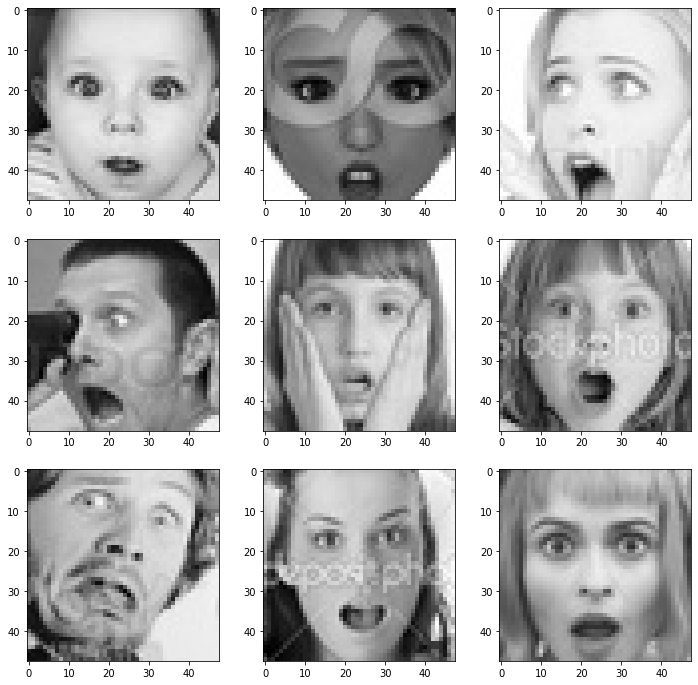

In [20]:
expression = 'surprise'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [21]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [22]:
# Model Building

In [23]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
# Fitting the Model with Training and Validation Data 

In [32]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 20

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [33]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

<ipython-input-33-981791b505f2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/20
223/224 [============================>.] - ETA: 0s - loss: 0.8151 - accuracy: 0.6953

224/224 [==============================] - 14s 57ms/step - loss: 0.8168 - accuracy: 0.6947 - val_loss: 1.1008 - val_accuracy: 0.6073 - lr: 0.0010
Epoch 2/20
224/224 [==============================] - ETA: 0s - loss: 0.7574 - accuracy: 0.7167

224/224 [==============================] - 13s 56ms/step - loss: 0.7574 - accuracy: 0.7167 - val_loss: 1.0743 - val_accuracy: 0.6189 - lr: 0.0010
Epoch 3/20
224/224 [==============================] - ETA: 0s - loss: 0.7222 - accuracy: 0.7297

224/224 [==============================] - 13s 56ms/step - loss: 0.7222 - accuracy: 0.7297 - val_loss: 1.2679 - val_accuracy: 0.5618 - lr: 0.0010
Epoch 4/20
224/224 [==============================] - ETA: 0s - loss: 0.6809 - accuracy: 0.7473

224/224 [==============================] - 13s 56ms/step - loss: 0.6809 - accuracy: 0.7473 - val_loss: 1.0603 - val_accuracy: 0.6285 - lr: 0.0010
Epoch 5/20
224/224 [==============================] - ETA: 0s - loss: 0.6341 - accuracy: 0.7632

224/224 [==============================] - 13s 56ms/step - loss: 0.6341 - accuracy: 0.7632 - val_loss: 1.0858 - val_accuracy: 0.6299 - lr: 0.0010
Epoch 6/20
224/224 [==============================] - ETA: 0s - loss: 0.5955 - accuracy: 0.7800

224/224 [==============================] - 14s 61ms/step - loss: 0.5955 - accuracy: 0.7800 - val_loss: 1.1614 - val_accuracy: 0.6233 - lr: 0.0010
Epoch 7/20
224/224 [==============================] - ETA: 0s - loss: 0.5578 - accuracy: 0.7929Restoring model weights from the end of the best epoch: 4.



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
224/224 [==============================] - 13s 57ms/step - loss: 0.5578 - accuracy: 0.7929 - val_loss: 1.1402 - val_accuracy: 0.6292 - lr: 0.0010
Epoch 7: early stopping


In [34]:
# Plotting Accuracy & Loss

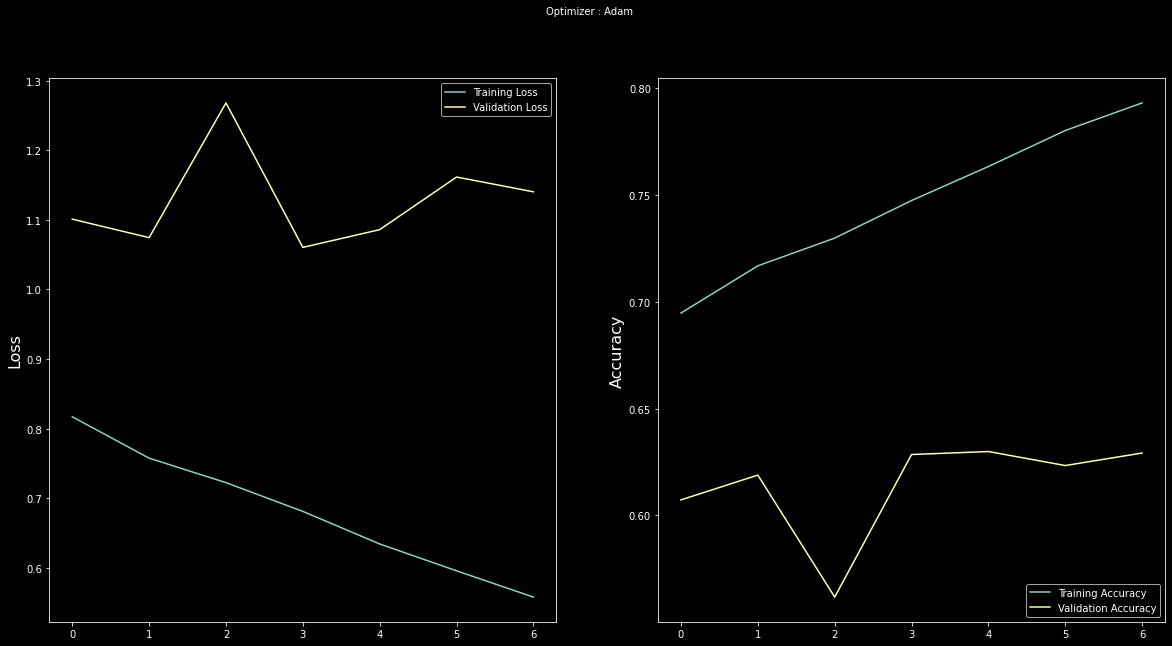

In [35]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()